In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

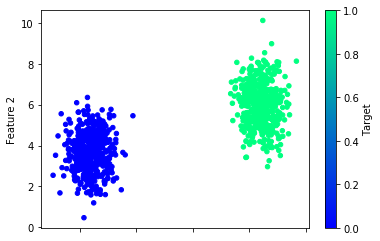

In [5]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [6]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Neural Network Below

In [9]:
# Create the Keras Sequential model (Sequential)
nn_model = tf.keras.models.Sequential()

# No specific classes for input/hidden/output layers. All use dense class.

#The input_dim parameter indicates how many inputs will be in the model (in this case two).
#The units parameter indicates how many neurons we want in the hidden layer (in this case one).
#The activation parameter indicates which activation function to use. 
#  We’ll use the ReLU activation function to allow our hidden layer to identify and 
#  train on nonlinear relationships in the dataset.

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 3s 4ms/sample - loss: 0.6888 - accuracy: 0.5307
Epoch 2/100
750/750 [==============================] - 0s 66us/sample - loss: 0.6847 - accuracy: 0.5840
Epoch 3/100
750/750 [==============================] - 0s 64us/sample - loss: 0.6800 - accuracy: 0.6267
Epoch 4/100
750/750 [==============================] - 0s 70us/sample - loss: 0.6740 - accuracy: 0.6867
Epoch 5/100
750/750 [==============================] - 0s 71us/sample - loss: 0.6662 - accuracy: 0.7507
Epoch 6/100
750/750 [==============================] - 0s 76us/sample - loss: 0.6567 - accuracy: 0.8040
Epoch 7/100
750/750 [==============================] - 0s 67us/sample - loss: 0.6443 - accuracy: 0.8640
Epoch 8/100
750/750 [==============================] - 0s 66us/sample - loss: 0.6293 - accuracy: 0.9173
Epoch 9/100
750/750 [==============================] - 0s 68us/sample - loss: 0.6126 - accuracy: 0.9493
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 64us/sample - loss: 0.1040 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 64us/sample - loss: 0.1023 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 61us/sample - loss: 0.1005 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 62us/sample - loss: 0.0989 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 60us/sample - loss: 0.0972 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 63us/sample - loss: 0.0956 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 66us/sample - loss: 0.0940 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 65us/sample - loss: 0.0925 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 65us/sample - loss: 0.0910 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 66us/samp

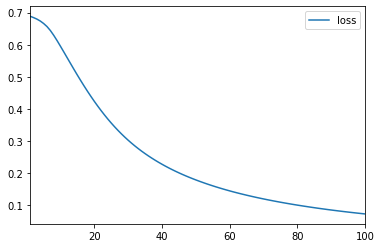

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

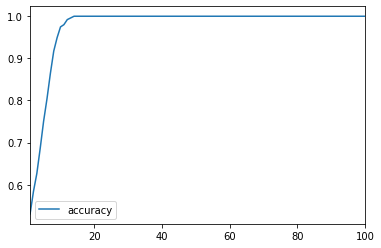

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.0763 - accuracy: 1.0000
Loss: 0.06857150143384934, Accuracy: 1.0


In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

nn_model.predict_classes(new_X)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

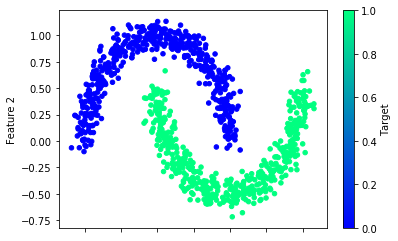

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 150us/sample - loss: 0.8407 - accuracy: 0.5667
Epoch 2/100
750/750 [==============================] - 0s 76us/sample - loss: 0.7351 - accuracy: 0.5947
Epoch 3/100
750/750 [==============================] - 0s 71us/sample - loss: 0.6623 - accuracy: 0.6160
Epoch 4/100
750/750 [==============================] - 0s 65us/sample - loss: 0.6156 - accuracy: 0.6360
Epoch 5/100
750/750 [==============================] - 0s 64us/sample - loss: 0.5788 - accuracy: 0.6547
Epoch 6/100
750/750 [==============================] - 0s 62us/sample - loss: 0.5510 - accuracy: 0.6667
Epoch 7/100
750/750 [==============================] - 0s 68us/sample - loss: 0.5283 - accuracy: 0.6827
Epoch 8/100
750/750 [==============================] - 0s 65us/sample - loss: 0.5093 - accuracy: 0.6947
Epoch 9/100
750/750 [==============================] - 0s 68us/sample - loss: 0.4931 - accuracy: 0.7053
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 68us/sample - loss: 0.2641 - accuracy: 0.8933
Epoch 79/100
750/750 [==============================] - 0s 70us/sample - loss: 0.2638 - accuracy: 0.8933
Epoch 80/100
750/750 [==============================] - 0s 69us/sample - loss: 0.2634 - accuracy: 0.8933
Epoch 81/100
750/750 [==============================] - 0s 60us/sample - loss: 0.2630 - accuracy: 0.8933
Epoch 82/100
750/750 [==============================] - 0s 63us/sample - loss: 0.2627 - accuracy: 0.8933
Epoch 83/100
750/750 [==============================] - 0s 67us/sample - loss: 0.2623 - accuracy: 0.8933
Epoch 84/100
750/750 [==============================] - 0s 61us/sample - loss: 0.2620 - accuracy: 0.8920
Epoch 85/100
750/750 [==============================] - 0s 69us/sample - loss: 0.2616 - accuracy: 0.8920
Epoch 86/100
750/750 [==============================] - 0s 71us/sample - loss: 0.2613 - accuracy: 0.8920
Epoch 87/100
750/750 [==============================] - 0s 71us/samp

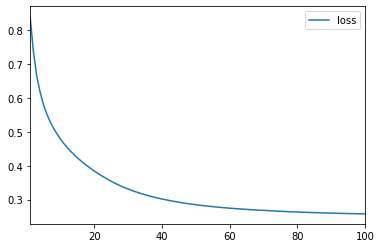

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

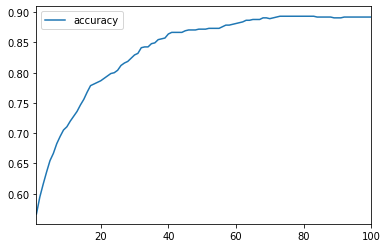

In [22]:
# Plot the loss
history_df.plot(y="accuracy")

In [23]:
# A good rule of thumb for a basic neural network is to have two to three times 
# the amount of neurons in the hidden layer as the number of inputs.

# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/sample - loss: 0.7909 - accuracy: 0.2907
Epoch 2/100
750/750 [==============================] - 0s 62us/sample - loss: 0.7479 - accuracy: 0.3080
Epoch 3/100
750/750 [==============================] - 0s 62us/sample - loss: 0.7091 - accuracy: 0.3600
Epoch 4/100
750/750 [==============================] - 0s 64us/sample - loss: 0.6745 - accuracy: 0.4387
Epoch 5/100
750/750 [==============================] - 0s 65us/sample - loss: 0.6427 - accuracy: 0.5467
Epoch 6/100
750/750 [==============================] - 0s 61us/sample - loss: 0.6138 - accuracy: 0.6373
Epoch 7/100
750/750 [==============================] - 0s 60us/sample - loss: 0.5868 - accuracy: 0.6787
Epoch 8/100
750/750 [==============================] - 0s 61us/sample - loss: 0.5621 - accuracy: 0.7067
Epoch 9/100
750/750 [==============================] - 0s 61us/sample - loss: 0.5391 - accuracy: 0.7293
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 66us/sample - loss: 0.2063 - accuracy: 0.9133
Epoch 79/100
750/750 [==============================] - 0s 72us/sample - loss: 0.2051 - accuracy: 0.9133
Epoch 80/100
750/750 [==============================] - 0s 72us/sample - loss: 0.2040 - accuracy: 0.9133
Epoch 81/100
750/750 [==============================] - 0s 68us/sample - loss: 0.2028 - accuracy: 0.9147
Epoch 82/100
750/750 [==============================] - 0s 69us/sample - loss: 0.2017 - accuracy: 0.9147
Epoch 83/100
750/750 [==============================] - 0s 66us/sample - loss: 0.2006 - accuracy: 0.9147
Epoch 84/100
750/750 [==============================] - 0s 85us/sample - loss: 0.1993 - accuracy: 0.9173
Epoch 85/100
750/750 [==============================] - 0s 79us/sample - loss: 0.1981 - accuracy: 0.9173
Epoch 86/100
750/750 [==============================] - 0s 78us/sample - loss: 0.1970 - accuracy: 0.9173
Epoch 87/100
750/750 [==============================] - 0s 68us/samp